### Import all required library

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from warnings import filterwarnings
filterwarnings('ignore')

### Upload CSV file

In [2]:
data = pd.read_csv("C:\Users\nachi\Documents\Email_Spam_Detection\spam.csv", encoding='ISO-8859-1')

In [3]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2039,ham,Dont pack what you can buy at any store.like c...,NaN,NaN,NaN
3364,ham,"Sorry, I'll call later",NaN,NaN,NaN
3627,ham,Meeting u is my work. . . Tel me when shall i ...,NaN,NaN,NaN
600,ham,Mind blastin.. No more Tsunamis will occur fro...,NaN,NaN,NaN
5104,ham,A Boy loved a gal. He propsd bt she didnt mind...,NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### We will drop last three columns because they have empty values

In [6]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
data.sample(5)

,v1,v2
4857,ham,Ok...
5511,ham,"ItÛ÷s reassuring, in this crazy world."
1726,ham,\ALRITE HUNNY!WOT U UP 2 2NITE? DIDNT END UP G...
4498,spam,"SMS SERVICES. for your inclusive text credits,..."
490,ham,"Sorry man my account's dry or I would, if you ..."


### Rename the columns

In [8]:
data.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
data.sample(5)

,target,text
4575,spam,Congratulations ur awarded 500 of CD vouchers ...
1392,ham,"Thk shld b can... Ya, i wana go 4 lessons... H..."
4252,ham,Juz now havent woke up so a bit blur blur... C...
3141,ham,Not planned yet :)going to join company on jan...
3545,ham,SO IS TH GOWER MATE WHICH IS WHERE I AM!?! HOW...


In [9]:
encoder = LabelEncoder()

In [10]:
data['target'] = encoder.fit_transform(data['target'])

In [11]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### We will check if there is still any empty/missing values

In [12]:
data.isnull().sum()

target    0
text      0
dtype: int64

### We will check if there are duplicate values or not

In [13]:
data.duplicated().sum()

403

In [14]:
data = data.drop_duplicates(keep='first')

### we will not remove the duplicates that are identified

In [15]:
data.shape

(5169, 2)

In [16]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

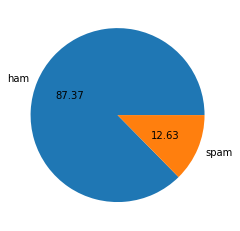

In [18]:
plt.pie(data['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

### The above piechart shows that our data is heavily imbalanced

### nltk.download()

In [21]:
data['num_characters'] = data['text'].apply(len)

In [22]:
data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
data.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
data.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [28]:
data[data['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


### spam data

In [29]:
data[data['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

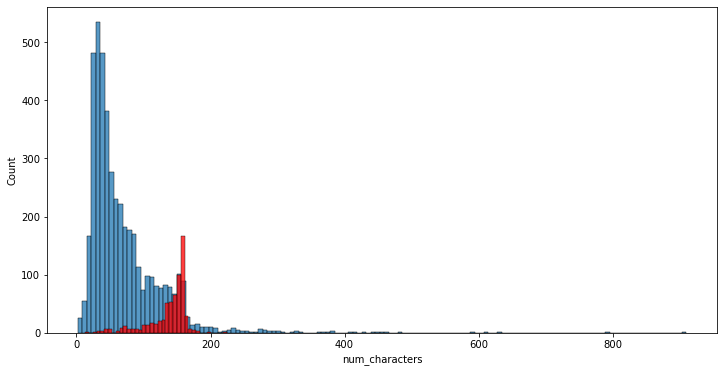

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_characters'])
sns.histplot(data[data['target'] == 1]['num_characters'], color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

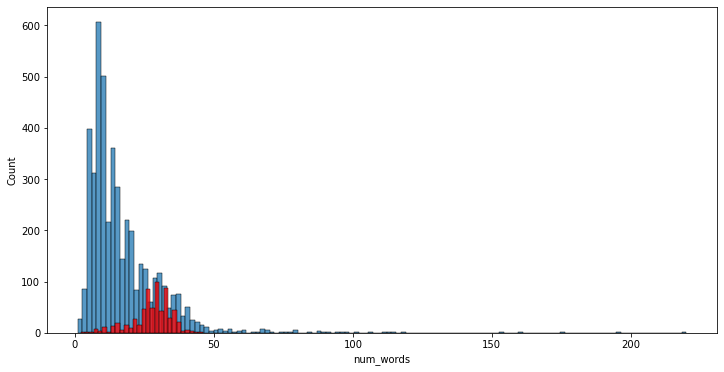

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_words'])
sns.histplot(data[data['target'] == 1]['num_words'],color='red')

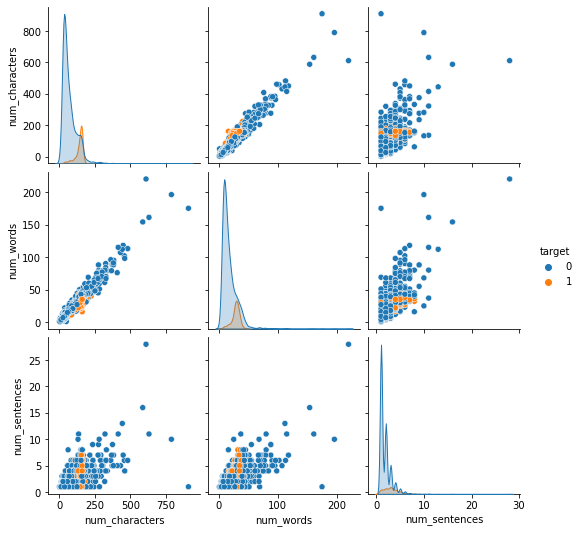

In [32]:
sns.pairplot(data,hue='target')

In [33]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    ps = PorterStemmer()
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [34]:
transform_text("Hello World is a on the for the fucking reading suring")

'hello world fuck read sure'

In [35]:
data['transformed_text'] = data['text'].apply(transform_text)

In [36]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [38]:
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))

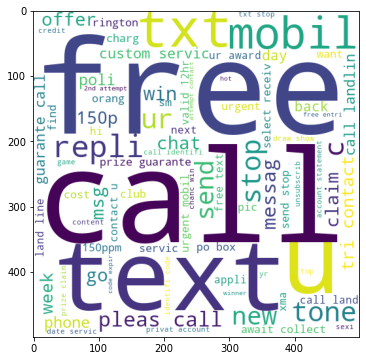

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [40]:
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))

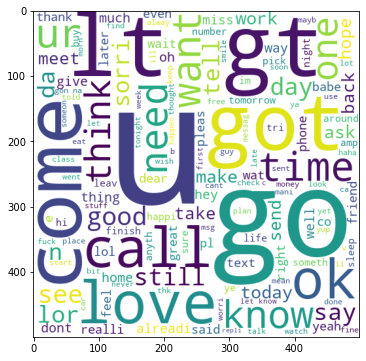

In [41]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [42]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [44]:
len(spam_corpus)

9939

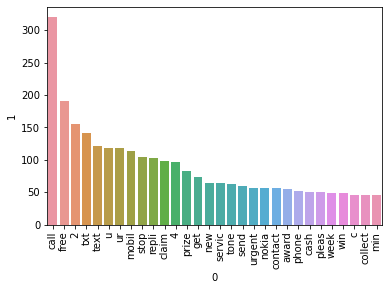

In [45]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [46]:
ham_corpus = []
for msg in data[data['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [47]:
len(ham_corpus)

35394

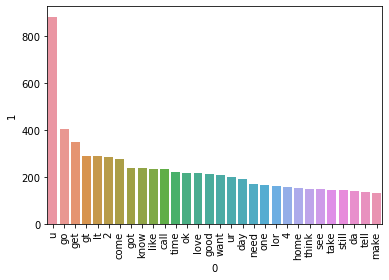

In [48]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### Text Vectorization using bag of words

In [49]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [51]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [52]:
X.shape

(5169, 3000)

In [53]:
y = data['target'].values

In [54]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [56]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2) 


In [57]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [58]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [59]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [60]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [61]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


### !pip install xgboost

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [64]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [65]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [66]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [67]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [68]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [69]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [70]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [71]:
import pickle 
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))